In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.datasets import make_gaussian_quantiles, make_moons, make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

## Make Dataset

In [2]:
X_moon, y_moon = make_moons(n_samples=500, noise=0.1, random_state=0)
X, y = make_classification(n_samples=600, n_features=2, n_clusters_per_class = 1, 
                           n_classes=3, n_redundant=0, n_informative=2, class_sep = 1.2, flip_y = 0,
                           shuffle=True, random_state=6)
X2, y2 = make_classification(n_samples=600, n_features=2, n_clusters_per_class = 1,
                           n_classes=3, n_redundant=0, n_informative=2, class_sep = 3, flip_y=0,
                           shuffle=True, random_state=6)

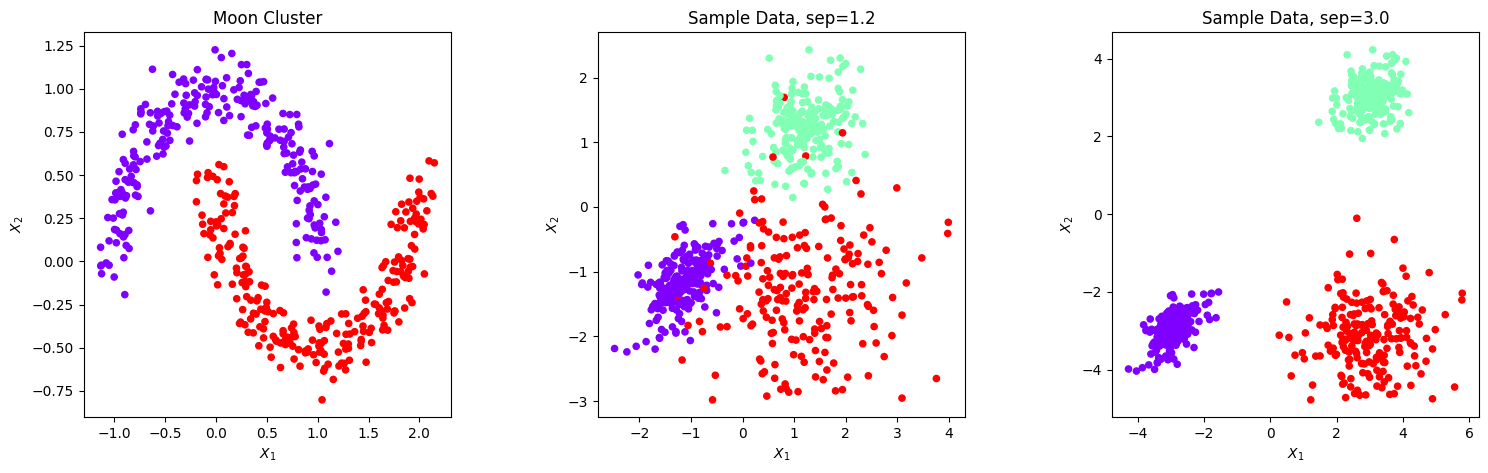

In [3]:
titles = ['Moon Cluster',
          'Sample Data, sep=1.2',
          'Sample Data, sep=3.0']
plt.figure(figsize=(18, 5)) 
for i, Xs in enumerate(([X_moon, y_moon], [X, y], [X2,y2])):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)
    
    plt.title(titles[i])
    plt.scatter(Xs[0][:,0], Xs[0][:,1], marker='o', c=Xs[1], s=20, cmap=plt.cm.rainbow)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

## SVM

Decision Boundary 그리기 코드 참고 : https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

### Moon

In [4]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_moon, y_moon)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_moon, y_moon)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_moon, y_moon)

* linear = C
* polynomial = C, gamma, degree, coef
* rbf : C, gamma

In [5]:
h = .01  # step size in the mesh
x_min, x_max = X_moon[:, 0].min() - 1, X_moon[:, 0].max() + 1
y_min, y_max = X_moon[:, 1].min() - 1, X_moon[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

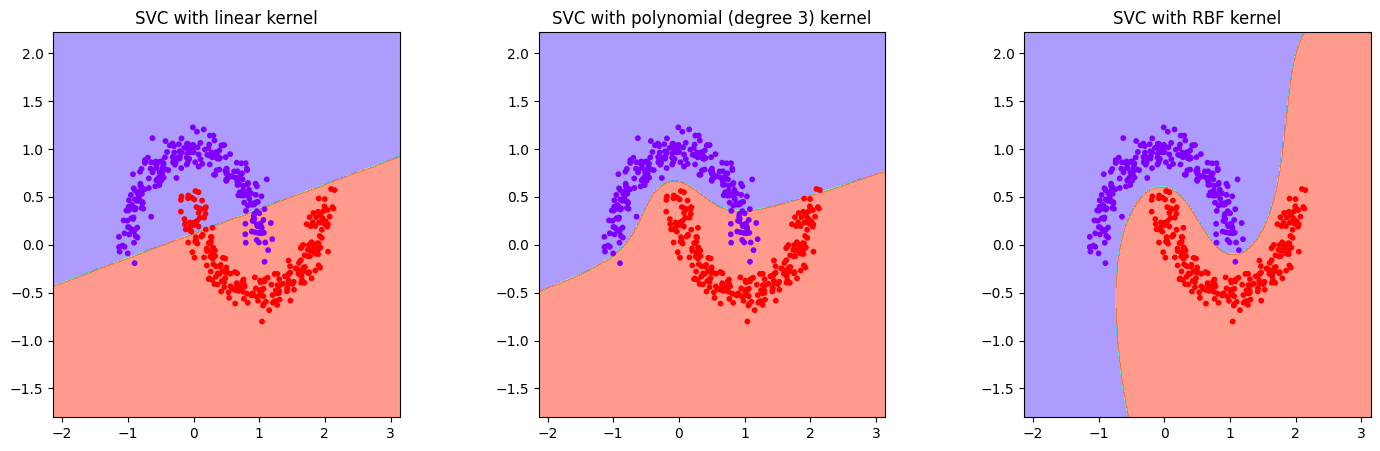

In [6]:
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel']
plt.figure(figsize=(17, 5)) 
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.5)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap=plt.cm.rainbow, s=10)
    plt.title(titles[i])

### Sample Data, sep=0.8

In [7]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [8]:
h = .01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

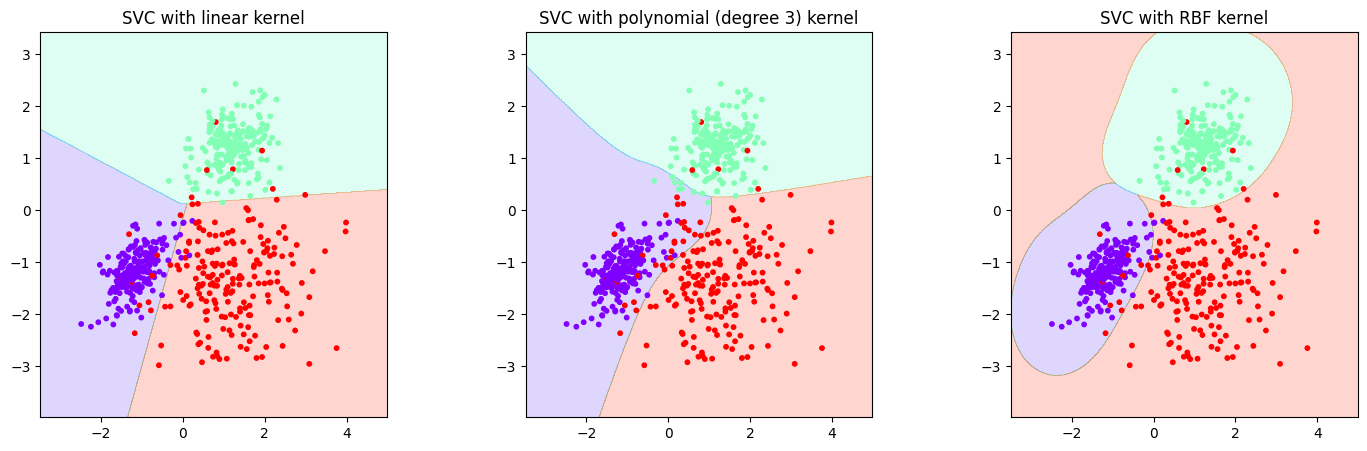

In [9]:
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel']
plt.figure(figsize=(17, 5)) 
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow, s=10)
    plt.title(titles[i])

### Sample Data, sep=2

In [10]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X2, y2)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X2, y2)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X2, y2)

In [11]:
h = .01  # step size in the mesh
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

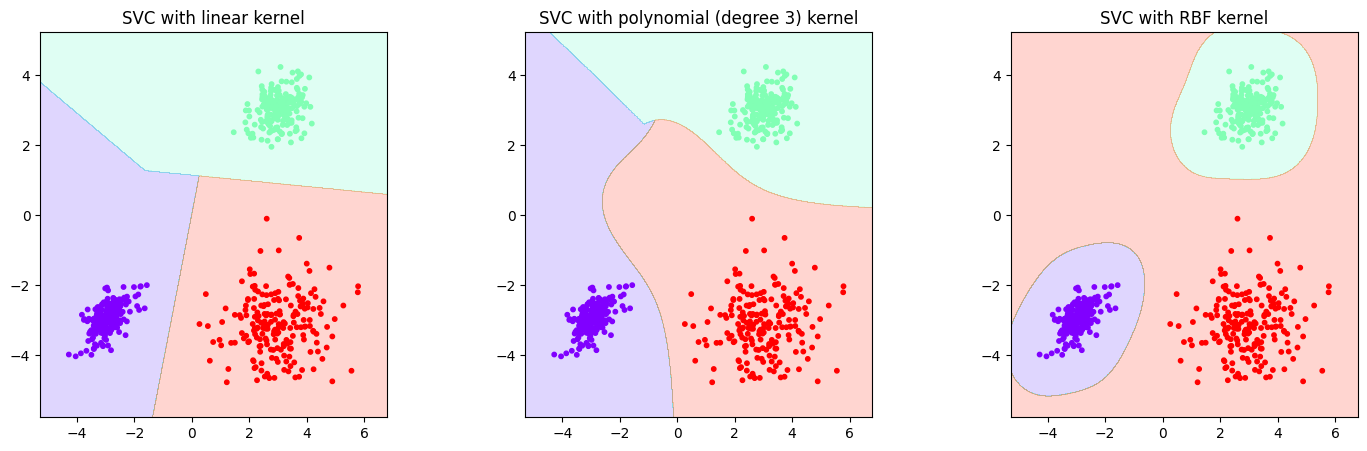

In [12]:
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel']
plt.figure(figsize=(17, 5)) 
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.rainbow, s=10)
    plt.title(titles[i])

## Hyper parameter (C, degree, gamma)

In [13]:
h = .01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

### Linear

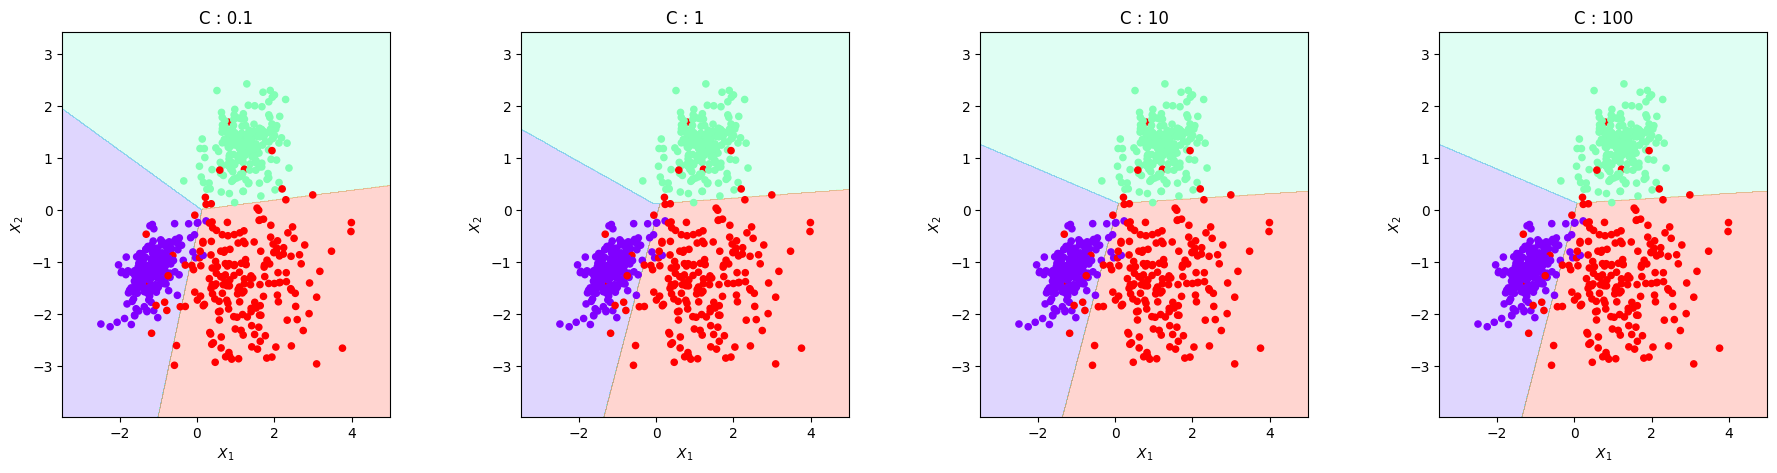

In [14]:
plt.figure(figsize=(22, 5)) 
for i, C in enumerate([0.1, 1, 10, 100]):
        svc = svm.SVC(kernel='linear', C=C).fit(X, y) 
        plt.subplot(1, 4, i+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.title(f"C : {C}")
        plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
        plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=20, cmap=plt.cm.rainbow)
        plt.xlabel("$X_1$")
        plt.ylabel("$X_2$")

### Polynomial

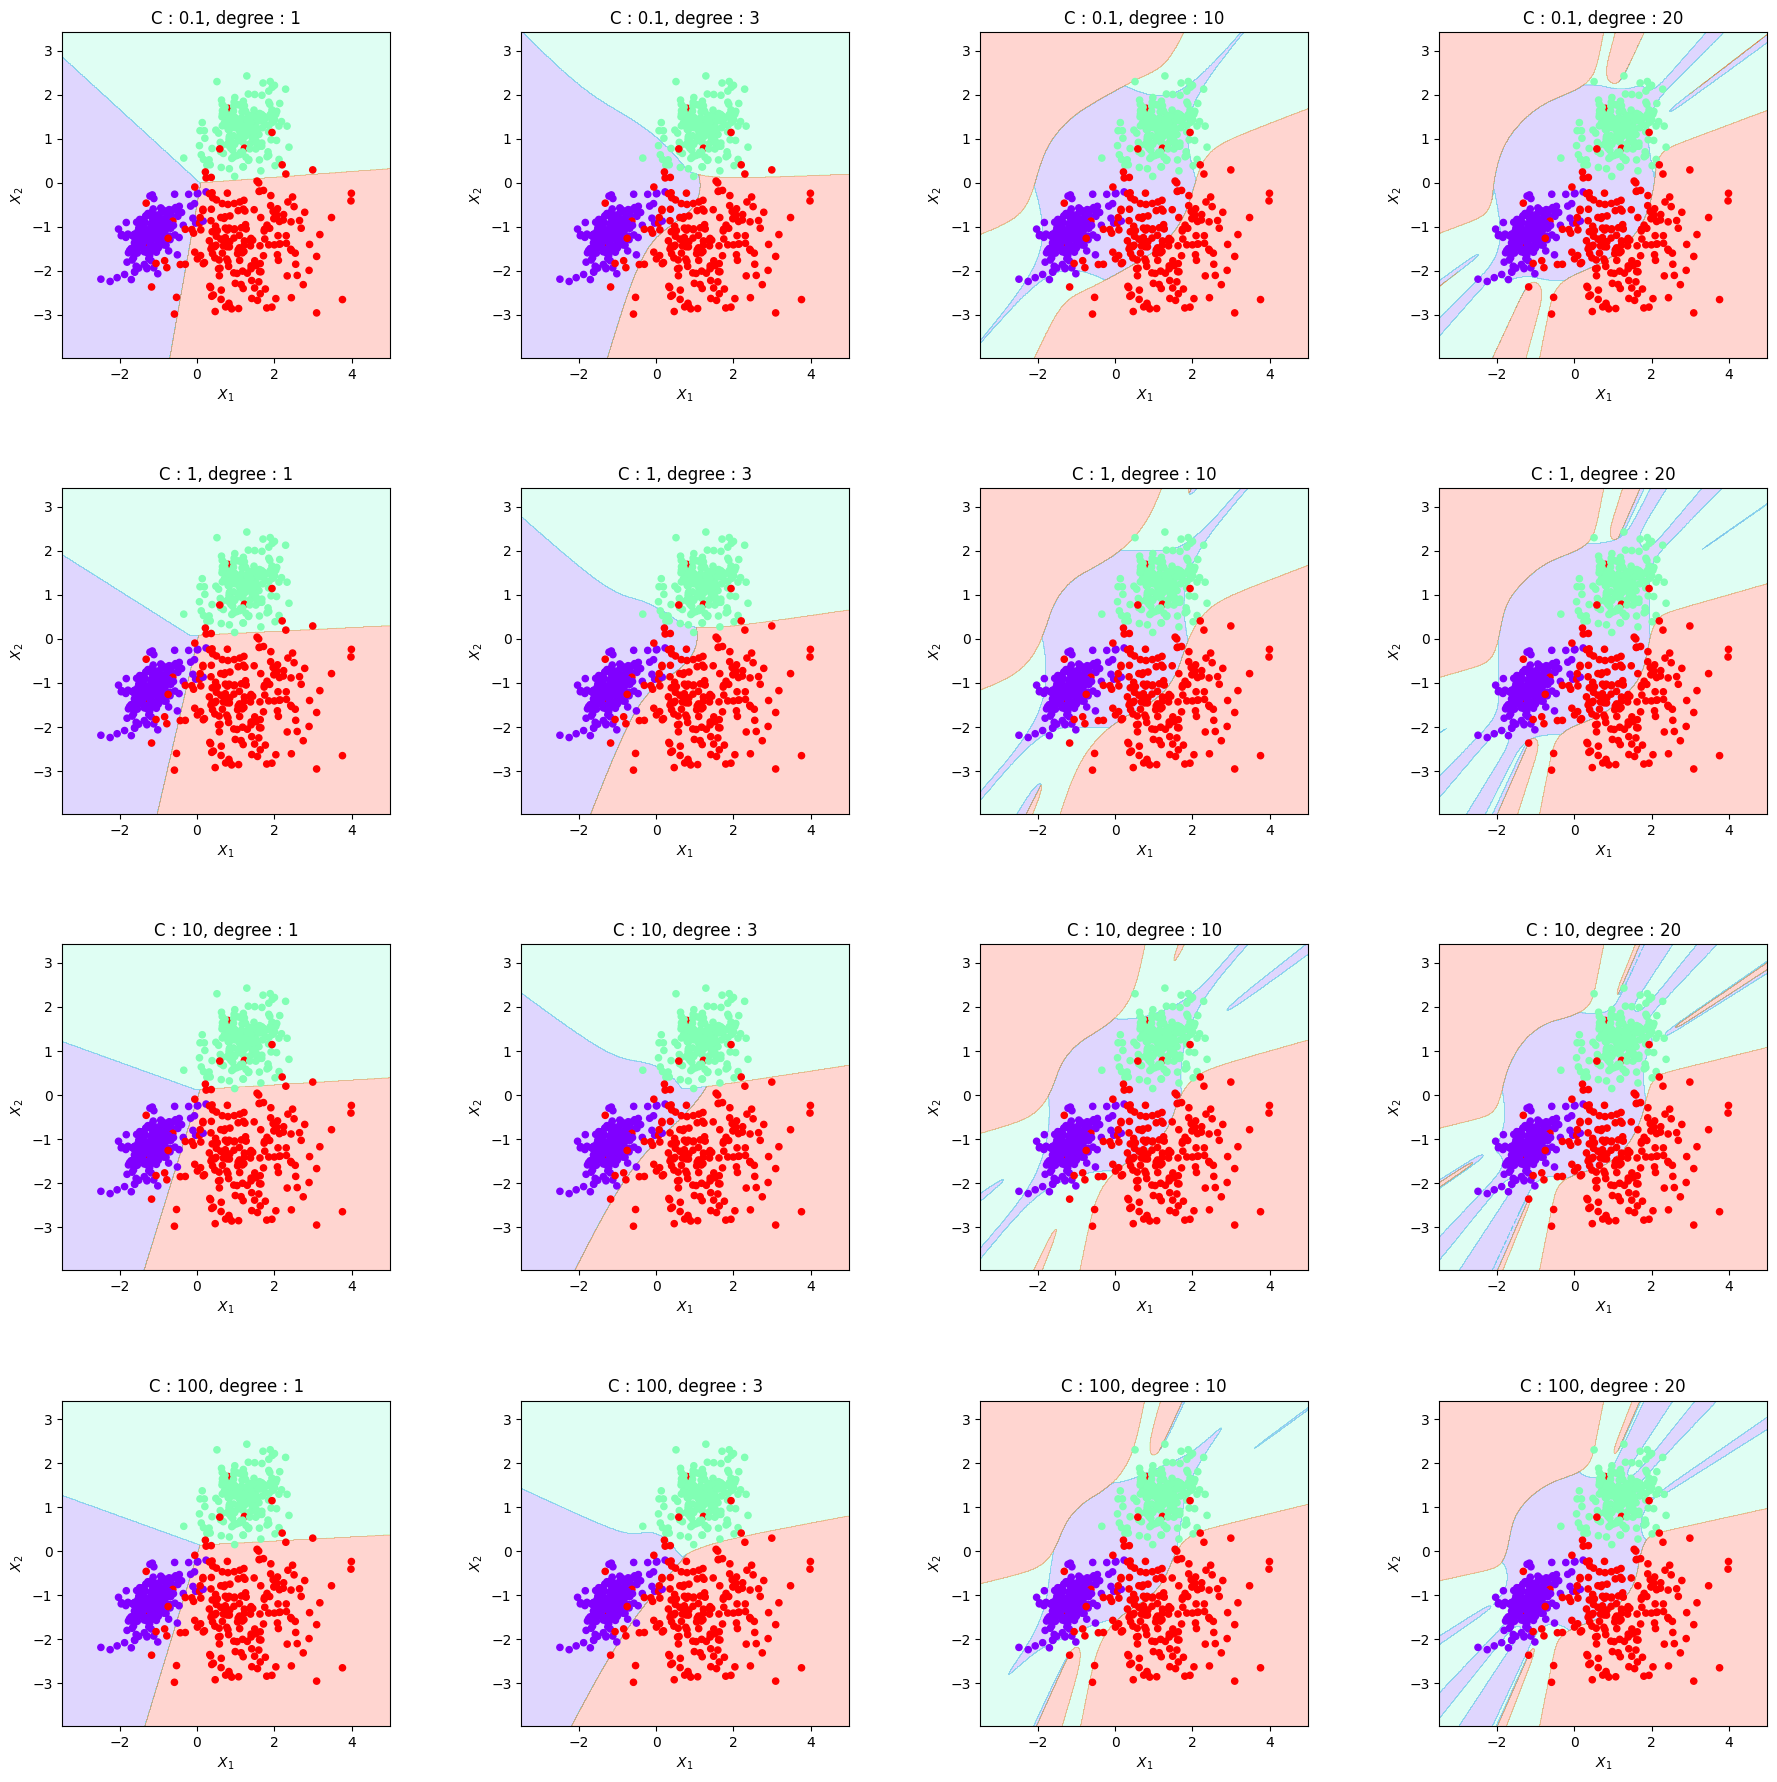

In [15]:
plt.figure(figsize=(22, 22)) 
for i, C in enumerate([0.1, 1, 10, 100]):
    for j, degree in enumerate([1, 3, 10, 20]):
        poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(X, y) 
        plt.subplot(4, 4, (i*4)+j+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.title(f"C : {C}, degree : {degree}")
        plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
        plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=20, cmap=plt.cm.rainbow)
        plt.xlabel("$X_1$")
        plt.ylabel("$X_2$")


### rbf

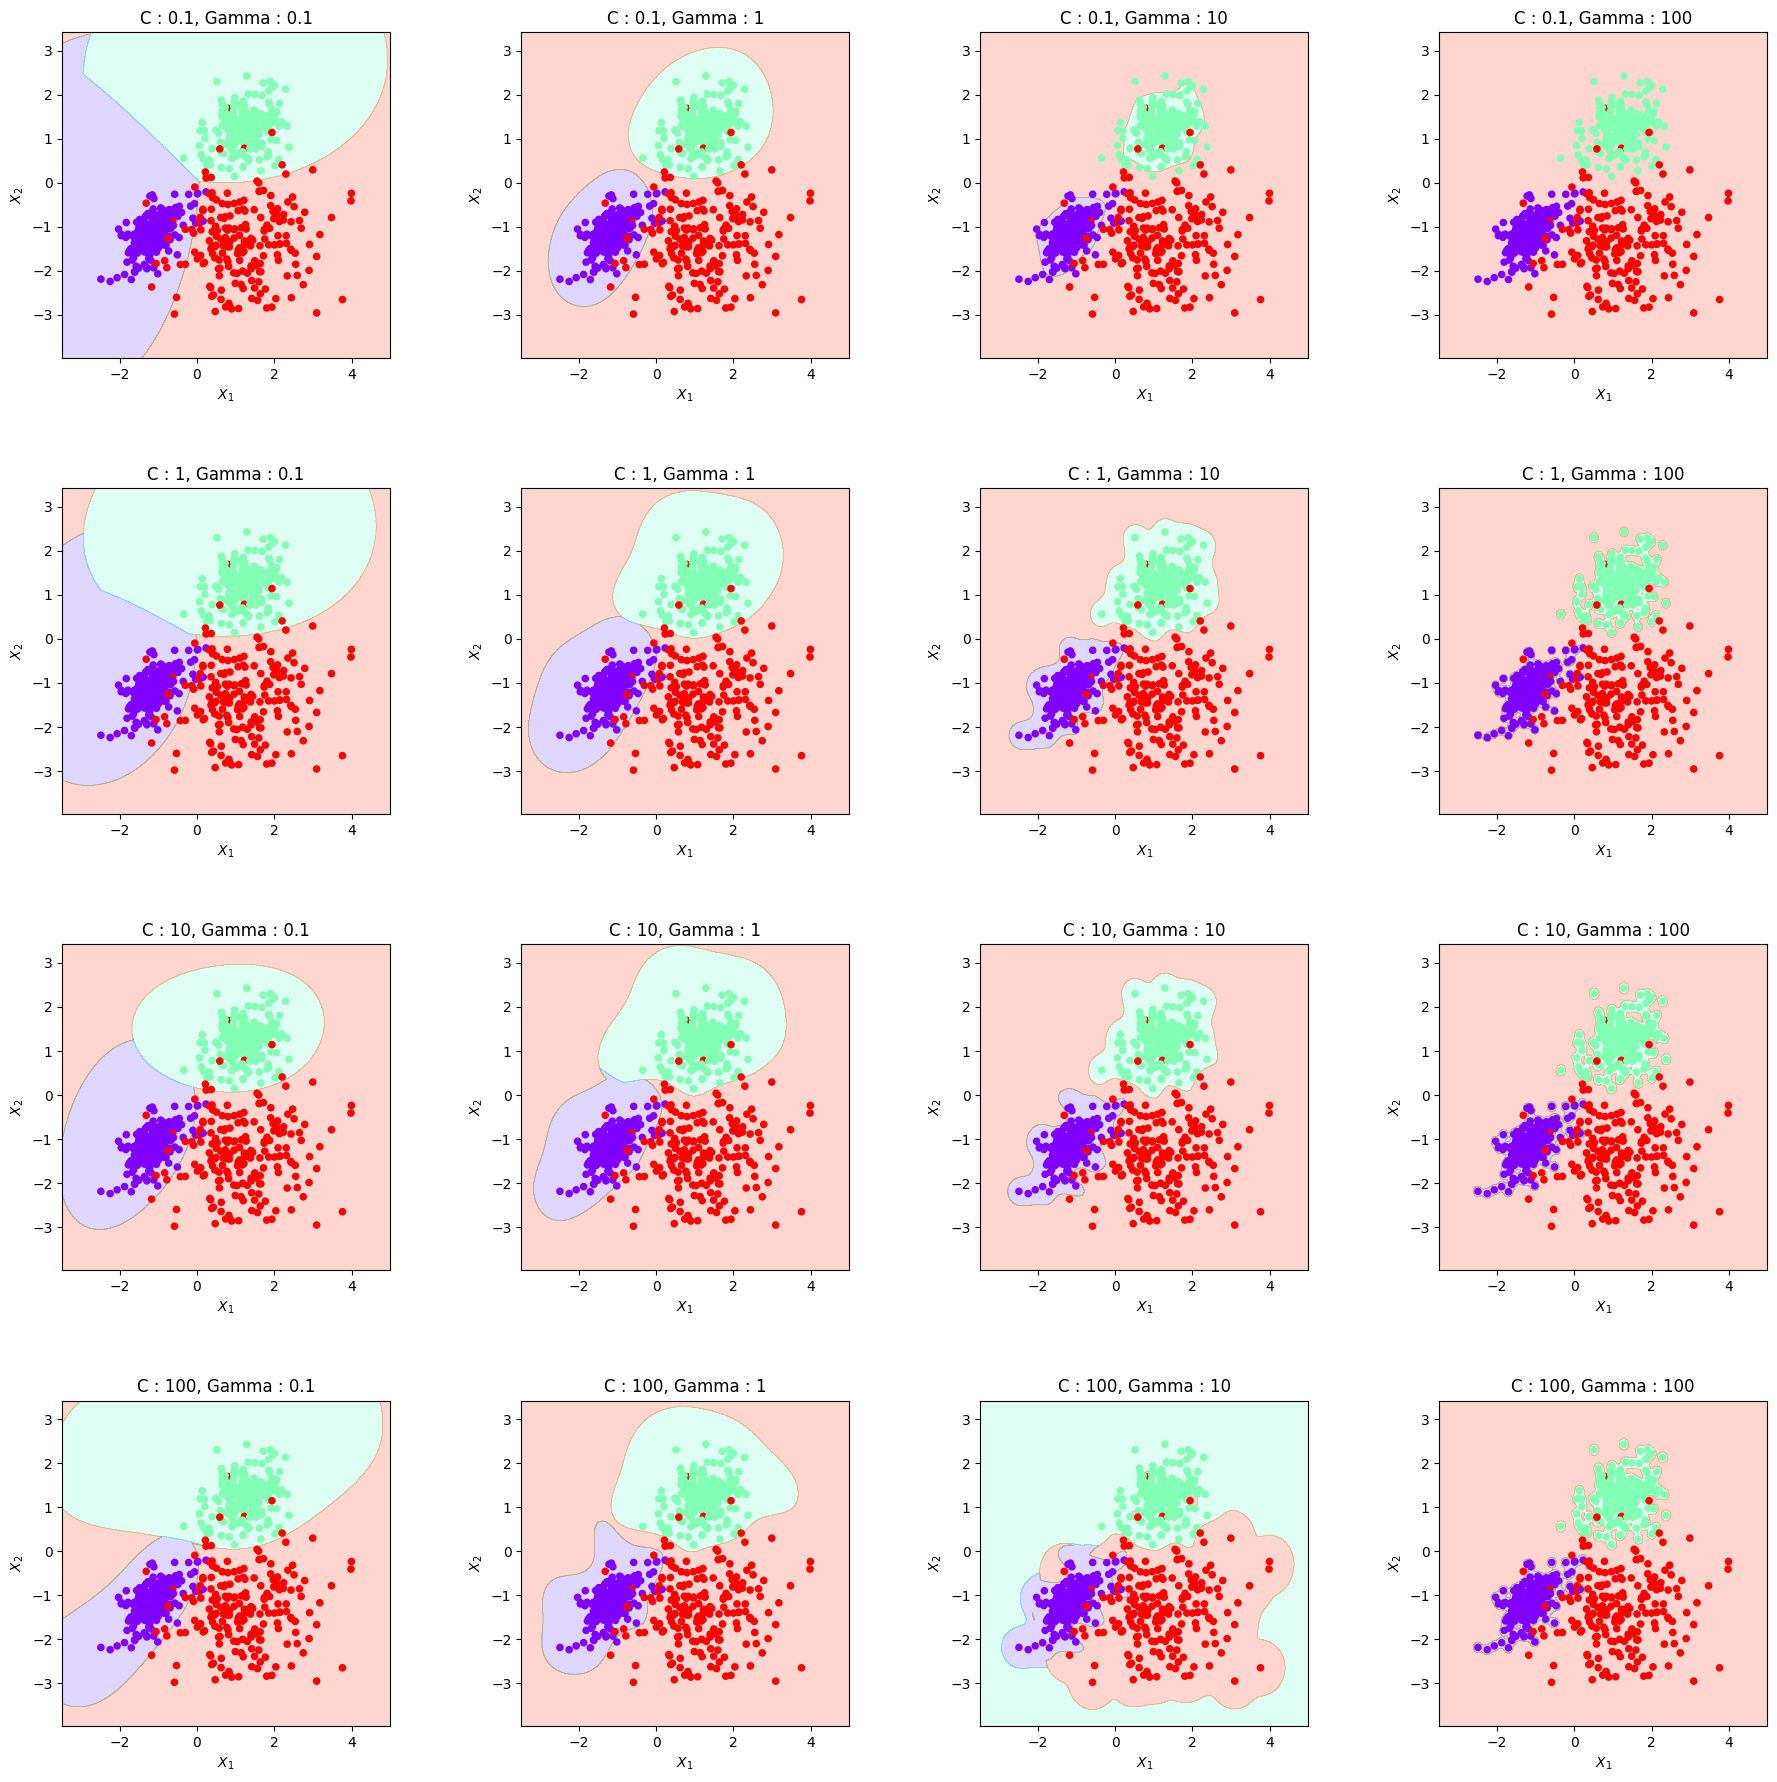

In [16]:
plt.figure(figsize=(22, 22)) 
for i, C in enumerate([0.1, 1, 10, 100]):
    for j, gamma in enumerate([0.1, 1, 10, 100]):
        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X, y) 
        plt.subplot(4, 4, (i*4)+j+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.title(f"C : {C}, Gamma : {gamma}")
        plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
        plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=20, cmap=plt.cm.rainbow)
        plt.xlabel("$X_1$")
        plt.ylabel("$X_2$")


## Application on Benchmark Dataset

출처 : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### 데이터셋 준비

In [31]:
df = pd.read_csv('data/data.csv')

In [32]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [58]:
df.isnull().all()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [44]:
X = df.iloc[:,2:-1]
y = df.iloc[:,1]
y.replace(['M','B'], [0,1], inplace=True) # M : 양성종양, B : 악성종양

In [50]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

### 실험 진행

In [116]:
columns = ['kernel','C','degree','Gamma','Accuracy','F1 score']
results = pd.DataFrame(columns=columns)

In [118]:
for random_state in [0,1,2,3,4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # rbf
    for C in [0.01, 0.1, 1, 10, 100]:
        for gamma in [0.01, 0.1, 1, 10, 100]:
            rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X_train, y_train)
            y_pred = rbf_svc.predict(X_test)

            result = ['rbf',C,'-',gamma,accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)]
            results.loc[len(results)] = result

    # polynomial
    for C in [0.01, 0.1, 1, 10, 100]:
        for degree in [1, 2, 3, 7, 10, 20]:
            poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(X_train, y_train)
            y_pred = poly_svc.predict(X_test)

            result = ['poly',C,degree,'-',accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)]
            results.loc[len(results)] = result

    # linear
    for C in [0.01, 0.1, 1, 10, 100]:
            linear_svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
            y_pred = rbf_svc.predict(X_test)

            result = ['linear',C,'-','-',accuracy_score(y_test, y_pred),f1_score(y_test, y_pred)]
            results.loc[len(results)] = result

In [122]:
result_df = results.groupby(['kernel','C','degree','Gamma']).agg(['mean','std'])

In [123]:
result_df

Accuracy            F1 score          
                                mean       std      mean       std
kernel C      degree Gamma                                        
linear 0.01   -      -      0.629371  0.021554  0.772362  0.016079
       0.10   -      -      0.629371  0.021554  0.772362  0.016079
       1.00   -      -      0.629371  0.021554  0.772362  0.016079
       10.00  -      -      0.629371  0.021554  0.772362  0.016079
       100.00 -      -      0.629371  0.021554  0.772362  0.016079
poly   0.01   1      -      0.868531  0.043221  0.905600  0.030241
              2      -      0.662937  0.029002  0.788671  0.019300
              3      -      0.707692  0.041194  0.811614  0.025302
              7      -      0.711888  0.044886  0.813525  0.027375
              10     -      0.704895  0.039373  0.808503  0.023466
              20     -      0.724476  0.044393  0.819103  0.025447
       0.10   1      -      0.959441  0.011491  0.968603  0.009139
              2      -      0.744056  0.052471  0.831408  0.031539
              3      -      0.832168  0.044228  0.882716  0.028674
              7      -      0.756643  0.047788  0.837437  0.028833
              10     -      0.738462  0.047583  0.827390  0.027734
              20     -      0.728671  0.047015  0.821428  0.027042
       1.00   1      -      0.967832  0.006255  0.974724  0.005095
              2      -      0.822378  0.030722  0.873978  0.020937
              3      -      0.913287  0.022981  0.935379  0.017583
              7      -      0.809790  0.041489  0.868676  0.026932
              10     -      0.756643  0.044613  0.836523  0.026581
              20     -      0.735664  0.045428  0.824127  0.027176
       10.00  1      -      0.974825  0.010605  0.979992  0.008553
              2      -      0.872727  0.018764  0.905160  0.013516
              3      -      0.955245  0.016841  0.965297  0.013173
              7      -      0.841958  0.043839  0.887977  0.029738
              10     -      0.774825  0.035451  0.842334  0.021254
              20     -      0.746853  0.039061  0.828317  0.023631
       100.00 1      -      0.967832  0.010605  0.974232  0.008594
              2      -      0.855944  0.020745  0.887724  0.017804
              3      -      0.958042  0.016400  0.966956  0.012888
              7      -      0.879720  0.017412  0.911679  0.012674
              10     -      0.776224  0.028406  0.838366  0.019888
              20     -      0.749650  0.035794  0.825793  0.023230
rbf    0.01   -      0.01   0.629371  0.021554  0.772362  0.016079
                     0.1    0.629371  0.021554  0.772362  0.016079
                     1.0    0.629371  0.021554  0.772362  0.016079
                     10.0   0.629371  0.021554  0.772362  0.016079
                     100.0  0.629371  0.021554  0.772362  0.016079
       0.10   -      0.01   0.951049  0.012112  0.961921  0.009954
                     0.1    0.934266  0.013632  0.947863  0.010639
                     1.0    0.629371  0.021554  0.772362  0.016079
                     10.0   0.629371  0.021554  0.772362  0.016079
                     100.0  0.629371  0.021554  0.772362  0.016079
       1.00   -      0.01   0.970629  0.011491  0.976971  0.008970
                     0.1    0.952448  0.003127  0.961651  0.003282
                     1.0    0.632168  0.024525  0.773702  0.017490
                     10.0   0.629371  0.021554  0.772362  0.016079
                     100.0  0.629371  0.021554  0.772362  0.016079
       10.00  -      0.01   0.973427  0.010372  0.978899  0.008263
                     0.1    0.942657  0.018101  0.952947  0.016252
                     1.0    0.634965  0.027709  0.775053  0.018986
                     10.0   0.629371  0.021554  0.772362  0.016079
                     100.0  0.629371  0.021554  0.772362  0.016079
       100.00 -      0.01   0.965035  0.017829  0.971475  0.015845
                     0.1    0.941259  0.018894  0.951844  0.016789
        

In [134]:
result_df.reset_index(level=[0,1,2,3]).sort_values(by=('F1 score', 'mean'), ascending=False).

kernel       C degree  Gamma  Accuracy            F1 score          
                                      mean       std      mean       std
23    poly   10.00      1      -  0.974825  0.010605  0.979992  0.008553
50     rbf   10.00      -   0.01  0.973427  0.010372  0.978899  0.008263
45     rbf    1.00      -   0.01  0.970629  0.011491  0.976971  0.008970
17    poly    1.00      1      -  0.967832  0.006255  0.974724  0.005095
29    poly  100.00      1      -  0.967832  0.010605  0.974232  0.008594
55     rbf  100.00      -   0.01  0.965035  0.017829  0.971475  0.015845
11    poly    0.10      1      -  0.959441  0.011491  0.968603  0.009139
31    poly  100.00      3      -  0.958042  0.016400  0.966956  0.012888
25    poly   10.00      3      -  0.955245  0.016841  0.965297  0.013173
40     rbf    0.10      -   0.01  0.951049  0.012112  0.961921  0.009954
46     rbf    1.00      -    0.1  0.952448  0.003127  0.961651  0.003282
51     rbf   10.00      -    0.1  0.942657  0.018101  0.952947  0.016252
56     rbf  100.00      -    0.1  0.941259  0.018894  0.951844  0.016789
41     rbf    0.10      -    0.1  0.934266  0.013632  0.947863  0.010639
19    poly    1.00      3      -  0.913287  0.022981  0.935379  0.017583
32    poly  100.00      7      -  0.879720  0.017412  0.911679  0.012674
5     poly    0.01      1      -  0.868531  0.043221  0.905600  0.030241
24    poly   10.00      2      -  0.872727  0.018764  0.905160  0.013516
26    poly   10.00      7      -  0.841958  0.043839  0.887977  0.029738
30    poly  100.00      2      -  0.855944  0.020745  0.887724  0.017804
13    poly    0.10      3      -  0.832168  0.044228  0.882716  0.028674
18    poly    1.00      2      -  0.822378  0.030722  0.873978  0.020937
20    poly    1.00      7      -  0.809790  0.041489  0.868676  0.026932
27    poly   10.00     10      -  0.774825  0.035451  0.842334  0.021254
33    poly  100.00     10      -  0.776224  0.028406  0.838366  0.019888
14    poly    0.10      7      -  0.756643  0.047788  0.837437  0.028833
21    poly    1.00     10      -  0.756643  0.044613  0.836523  0.026581
12    poly    0.10      2      -  0.744056  0.052471  0.831408  0.031539
28    poly   10.00     20      -  0.746853  0.039061  0.828317  0.023631
15    poly    0.10     10      -  0.738462  0.047583  0.827390  0.027734
34    poly  100.00     20      -  0.749650  0.035794  0.825793  0.023230
22    poly    1.00     20      -  0.735664  0.045428  0.824127  0.027176
16    poly    0.10     20      -  0.728671  0.047015  0.821428  0.027042
10    poly    0.01     20      -  0.724476  0.044393  0.819103  0.025447
8     poly    0.01      7      -  0.711888  0.044886  0.813525  0.027375
7     poly    0.01      3      -  0.707692  0.041194  0.811614  0.025302
9     poly    0.01     10      -  0.704895  0.039373  0.808503  0.023466
6     poly    0.01      2      -  0.662937  0.029002  0.788671  0.019300
57     rbf  100.00      -    1.0  0.634965  0.027709  0.775053  0.018986
52     rbf   10.00      -    1.0  0.634965  0.027709  0.775053  0.018986
47     rbf    1.00      -    1.0  0.632168  0.024525  0.773702  0.017490
58     rbf  100.00      -   10.0  0.629371  0.021554  0.772362  0.016079
53     rbf   10.00      -   10.0  0.629371  0.021554  0.772362  0.016079
49     rbf    1.00      -  100.0  0.629371  0.021554  0.772362  0.016079
48     rbf    1.00      -   10.0  0.629371  0.021554  0.772362  0.016079
54     rbf   10.00      -  100.0  0.629371  0.021554  0.772362  0.016079
0   linear    0.01      -      -  0.629371  0.021554  0.772362  0.016079
44     rbf    0.10      -  100.0  0.629371  0.021554  0.772362  0.016079
43     rbf    0.10      -   10.0  0.629371  0.021554  0.772362  0.016079
42     rbf    0.10      -    1.0  0.629371  0.021554  0.772362  0.016079
39     rbf    0.01      -  100.0  0.629371  0.021554  0.772362  0.016079
38     rbf    0.01      -   10.0  0.629371  0.021554  0.772362  0.016079
37     rbf    0.01      -    1.0  0.629371  0.021554  0.772362